# Linear Regression using TensorFlow

* This notebook is adapted from [Aymeric Damian's notebook](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb) 

* Clone the full collection from [here](https://github.com/aymericdamien/TensorFlow-Examples).

## Linear Regression: a short review

We are assuming that this is not the first time you are using Linear, if it isnt, 
we recommend you review: [linear regression review in dataschool.io](http://www.dataschool.io/linear-regression-in-python/)

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the others are considered to be dependent variables. For our example, we want to relate the variable Y to the variable X using a linear regression model. 

## A linear model

$y$ is a linear function of the vector $\vec{x}=(x_1,\ldots,x_p)$ if:  
$y = b + w_1 x_1 + \ldots+w_p x_p$  
Where:  
* $y$ is the output or regressed variable
* $\vec{w} = (w_1,\ldots,v_p)$ are the weights
* $b$ is the bias term
* $\vec{x}=(x_1,\ldots,x_p)$ is the feature vector

For this example, we will use some toy data so that we can get a hang of how to build a model without worrying about how to manage the data.

### Some toy data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
rng = np.random
logs_path = 'logs/lesson1'

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

## Tensorflow representation of a Linear Regression Model

New TensorFlow concepts:
1. Placeholders $\sim$ input ports
1. Variables $\sim$ Variables
1. Namescopes $\sim$ subroutine name-spaces

### [Placeholders](https://www.tensorflow.org/api_guides/python/io_ops#Placeholders) 
Define entry points for training data. Similar to *ports* in computer systems.

In [3]:
# Defining the computational graph for linear regression with 1 explanatory variable
# p = 1

# Input to the graph
y = tf.placeholder(dtype = tf.float32, name = 'InputData') # Placeholders - https://www.tensorflow.org/api_guides/python/io_ops#Placeholders
x = tf.placeholder(dtype = tf.float32, name = 'LabelData')

### [Variables](https://www.tensorflow.org/programmers_guide/variables)
Similar to variables in a programming language such as python.

In [8]:
# Model parameters are defined using variables
# Variables retain their value even outside the bounds of a session's run call
w = tf.Variable(initial_value = rng.randn(), name = "weight") 
b = tf.Variable(initial_value = rng.randn(), name = "bias")

### name_scope
Defines a name-space which is used by a function. and defines a node in the TensorFlow graph.

In [9]:
# Connecting up the nodes in our linear model
# y = b + Wx
with tf.name_scope('model'):
    prediction = tf.add(b, tf.multiply(w, x))

# prediction holds the tensor that is the output of the operation add which takes tensors b, and the output of the multiply operation between the weight w, and the input x

First we will build the computational graph for linear regression based on the algebraic equation that the model is defined by. We will use two new TensorFlow concepts, placeholders and variables, to build our graph. 

Placeholders are entry points into the graph allowing for training data to be passed into the graph.

Variables are used to represent parameters of the graph which need to retain their value between runs (iterations) while training in a session. 

## Learning the Regression parameters

In [10]:
# Defining loss for our model
# Loss is the mean squared error between actual $y$ and predicted $y$
with tf.name_scope('Loss'):
    loss = tf.reduce_sum( input_tensor = tf.pow(prediction-y, 2))/(2*n_samples)
# reduce_sum is a function to compute the sum across dimensions of a tensor. In this case, the input tensor is a 1 x n_samples dimensional tensor of the prediction errors corresponding to the training samples  
# https://www.tensorflow.org/api_docs/python/tf/reduce_sum
tf.summary.scalar("loss", loss)
merged_summary_op = tf.summary.merge_all()
#Our previous definitions implicitly creates the relation between the loss and the variables w and b 

# We can use gradient descent to train our linear model
# https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer
learning_rate = 0.01
with tf.name_scope('SGD'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [11]:
with tf.name_scope('Loss'):
    loss = tf.reduce_sum( input_tensor = tf.pow(prediction-y, 2))/(2*n_samples)

tf.summary.scalar("loss", loss)
merged_summary_op = tf.summary.merge_all()

learning_rate = 0.01
with tf.name_scope('SGD'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

The computational graph that we just defined:

<center><img src="../../resources/img/LinearRegression.png" alt="An example image of an ML model visualized using TensorBoard" style="width:800px;"></center>

In [12]:
# We also need an operation to initialize our global variables (w and b)
init = tf.global_variables_initializer()

New concepts:
3. reduce_sum operation: https://www.tensorflow.org/api_docs/python/tf/reduce_sum
4. Gradient descent optimizer: https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer

We now have a complete computational graph. Each run of the optimizer takes one sample of X and Y as input, makes a prediction. The optimizer updates the free variables in its loss function based on the prediction for that input.

## Executing the Computational Graph in a session

- Training the computational graph
```
with tf.Session() as sess:
    sess.run(init)
    
    for each epoch:
        for each (training sample:sample_x, training label:sample_y):
            sess.run(optimizer, feed_dict={x: sample_x, y: sample_y})
```

- Evaluating the computational graph to calculate training loss:
```
with tf.Session() as sess:
    c = sess.run(loss, feed_dict={x:train_X, y:train_Y})
```

In [13]:
# We can now run the computational graph in a session
training_epochs = 1000              # We will run our model 1000 times
display_step = 1                 # Display the loss every 100 runs
final_w, final_b = 0,0
with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    # Fit all training data
    for epoch in range(training_epochs):
        for (sample_x, sample_y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={x: sample_x, y: sample_y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c , summary= sess.run([loss, merged_summary_op], feed_dict={x: train_X, y:train_Y})
            summary_writer.add_summary(summary, epoch)
            print("Epoch:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(c), \
                "w=", sess.run(w), "b=", sess.run(b))

    print("Optimization Finished!")
    training_loss = sess.run(loss, feed_dict={x: train_X, y:train_Y})
    print("Training loss=", training_loss, "w=", sess.run(w), "b=", sess.run(b), '\n')
    final_w, final_b = sess.run(w), sess.run(b)

Epoch: 0001 loss= 5.892916679 w= 0.14512706 b= -1.9392008
Epoch: 0002 loss= 2.692253113 w= 0.32039288 b= -1.9108802
Epoch: 0003 loss= 1.404664636 w= 0.4307904 b= -1.8918091
Epoch: 0004 loss= 0.883288741 w= 0.50026643 b= -1.8785745
Epoch: 0005 loss= 0.669912696 w= 0.5439277 b= -1.8690234
Epoch: 0006 loss= 0.581048250 w= 0.57130426 b= -1.8617973
Epoch: 0007 loss= 0.542958021 w= 0.5884079 b= -1.8560394
Epoch: 0008 loss= 0.525845826 w= 0.59903085 b= -1.8512092
Epoch: 0009 loss= 0.517568350 w= 0.6055661 b= -1.8469657
Epoch: 0010 loss= 0.513114393 w= 0.60952264 b= -1.8430936
Epoch: 0011 loss= 0.510376275 w= 0.61185277 b= -1.8394575
Epoch: 0012 loss= 0.508444071 w= 0.613157 b= -1.8359717
Epoch: 0013 loss= 0.506910682 w= 0.6138142 b= -1.8325821
Epoch: 0014 loss= 0.505585790 w= 0.6140635 b= -1.8292547
Epoch: 0015 loss= 0.504375875 w= 0.6140556 b= -1.8259679
Epoch: 0016 loss= 0.503232181 w= 0.6138858 b= -1.822708
Epoch: 0017 loss= 0.502128899 w= 0.61361396 b= -1.8194671
Epoch: 0018 loss= 0.50105

Epoch: 0159 loss= 0.376954943 w= 0.5556878 b= -1.4005532
Epoch: 0160 loss= 0.376219630 w= 0.55531263 b= -1.3978547
Epoch: 0161 loss= 0.375486016 w= 0.55493796 b= -1.395159
Epoch: 0162 loss= 0.374754310 w= 0.55456376 b= -1.392467
Epoch: 0163 loss= 0.374024332 w= 0.5541899 b= -1.3897781
Epoch: 0164 loss= 0.373296052 w= 0.5538166 b= -1.3870925
Epoch: 0165 loss= 0.372569680 w= 0.55344373 b= -1.3844101
Epoch: 0166 loss= 0.371845007 w= 0.55307144 b= -1.381731
Epoch: 0167 loss= 0.371122122 w= 0.5526995 b= -1.3790551
Epoch: 0168 loss= 0.370400965 w= 0.55232793 b= -1.3763827
Epoch: 0169 loss= 0.369681716 w= 0.5519568 b= -1.3737135
Epoch: 0170 loss= 0.368964225 w= 0.5515862 b= -1.3710479
Epoch: 0171 loss= 0.368248552 w= 0.5512161 b= -1.3683854
Epoch: 0172 loss= 0.367534459 w= 0.5508466 b= -1.3657261
Epoch: 0173 loss= 0.366822094 w= 0.5504773 b= -1.3630699
Epoch: 0174 loss= 0.366111547 w= 0.5501086 b= -1.3604171
Epoch: 0175 loss= 0.365402758 w= 0.54974025 b= -1.3577673
Epoch: 0176 loss= 0.3646956

Epoch: 0323 loss= 0.277545810 w= 0.49992222 b= -0.9993809
Epoch: 0324 loss= 0.277054012 w= 0.49961552 b= -0.9971738
Epoch: 0325 loss= 0.276563466 w= 0.49930912 b= -0.99496937
Epoch: 0326 loss= 0.276074052 w= 0.49900314 b= -0.9927676
Epoch: 0327 loss= 0.275585920 w= 0.49869746 b= -0.9905687
Epoch: 0328 loss= 0.275099009 w= 0.49839213 b= -0.9883724
Epoch: 0329 loss= 0.274613231 w= 0.49808723 b= -0.9861787
Epoch: 0330 loss= 0.274128705 w= 0.49778256 b= -0.98398775
Epoch: 0331 loss= 0.273645341 w= 0.49747843 b= -0.9817996
Epoch: 0332 loss= 0.273163140 w= 0.49717462 b= -0.979614
Epoch: 0333 loss= 0.272682190 w= 0.4968711 b= -0.9774314
Epoch: 0334 loss= 0.272202313 w= 0.49656805 b= -0.9752511
Epoch: 0335 loss= 0.271723658 w= 0.49626544 b= -0.9730735
Epoch: 0336 loss= 0.271246195 w= 0.4959632 b= -0.97089875
Epoch: 0337 loss= 0.270769864 w= 0.4956612 b= -0.9687266
Epoch: 0338 loss= 0.270294785 w= 0.49535957 b= -0.96655715
Epoch: 0339 loss= 0.269820750 w= 0.4950585 b= -0.9643903
Epoch: 0340 los

Epoch: 0471 loss= 0.216443196 w= 0.45837292 b= -0.70047736
Epoch: 0472 loss= 0.216101229 w= 0.45811707 b= -0.69863665
Epoch: 0473 loss= 0.215760112 w= 0.4578615 b= -0.69679826
Epoch: 0474 loss= 0.215419769 w= 0.45760626 b= -0.6949621
Epoch: 0475 loss= 0.215080336 w= 0.4573514 b= -0.6931282
Epoch: 0476 loss= 0.214741677 w= 0.45709673 b= -0.6912965
Epoch: 0477 loss= 0.214403853 w= 0.45684248 b= -0.6894671
Epoch: 0478 loss= 0.214066833 w= 0.45658848 b= -0.6876397
Epoch: 0479 loss= 0.213730663 w= 0.45633477 b= -0.6858146
Epoch: 0480 loss= 0.213395283 w= 0.45608136 b= -0.6839918
Epoch: 0481 loss= 0.213060752 w= 0.4558283 b= -0.6821712
Epoch: 0482 loss= 0.212727070 w= 0.45557556 b= -0.680353
Epoch: 0483 loss= 0.212394208 w= 0.45532313 b= -0.6785369
Epoch: 0484 loss= 0.212062135 w= 0.45507097 b= -0.676723
Epoch: 0485 loss= 0.211730853 w= 0.4548191 b= -0.67491126
Epoch: 0486 loss= 0.211400419 w= 0.45456755 b= -0.67310184
Epoch: 0487 loss= 0.211070776 w= 0.45431638 b= -0.67129457
Epoch: 0488 lo

Epoch: 0629 loss= 0.171597272 w= 0.42159766 b= -0.43591863
Epoch: 0630 loss= 0.171365172 w= 0.42138684 b= -0.43440214
Epoch: 0631 loss= 0.171133667 w= 0.42117628 b= -0.43288743
Epoch: 0632 loss= 0.170902759 w= 0.42096603 b= -0.43137464
Epoch: 0633 loss= 0.170672402 w= 0.42075598 b= -0.42986372
Epoch: 0634 loss= 0.170442581 w= 0.42054617 b= -0.42835462
Epoch: 0635 loss= 0.170213357 w= 0.4203367 b= -0.42684734
Epoch: 0636 loss= 0.169984654 w= 0.42012745 b= -0.4253419
Epoch: 0637 loss= 0.169756547 w= 0.41991842 b= -0.4238383
Epoch: 0638 loss= 0.169528976 w= 0.41970968 b= -0.42233655
Epoch: 0639 loss= 0.169301987 w= 0.41950125 b= -0.42083666
Epoch: 0640 loss= 0.169075549 w= 0.41929296 b= -0.41933864
Epoch: 0641 loss= 0.168849632 w= 0.41908497 b= -0.41784242
Epoch: 0642 loss= 0.168624312 w= 0.4188772 b= -0.416348
Epoch: 0643 loss= 0.168399528 w= 0.4186697 b= -0.41485548
Epoch: 0644 loss= 0.168175310 w= 0.4184625 b= -0.4133648
Epoch: 0645 loss= 0.167951643 w= 0.41825554 b= -0.41187593
Epoch:

Epoch: 0792 loss= 0.140382960 w= 0.39043376 b= -0.2117277
Epoch: 0793 loss= 0.140227407 w= 0.39026114 b= -0.21048594
Epoch: 0794 loss= 0.140072241 w= 0.39008877 b= -0.20924573
Epoch: 0795 loss= 0.139917448 w= 0.38991657 b= -0.20800702
Epoch: 0796 loss= 0.139763057 w= 0.38974458 b= -0.20676981
Epoch: 0797 loss= 0.139609024 w= 0.38957277 b= -0.20553413
Epoch: 0798 loss= 0.139455378 w= 0.38940126 b= -0.20429996
Epoch: 0799 loss= 0.139302105 w= 0.38922992 b= -0.20306729
Epoch: 0800 loss= 0.139149204 w= 0.3890588 b= -0.20183615
Epoch: 0801 loss= 0.138996646 w= 0.38888794 b= -0.20060651
Epoch: 0802 loss= 0.138844520 w= 0.3887172 b= -0.19937839
Epoch: 0803 loss= 0.138692752 w= 0.3885467 b= -0.19815178
Epoch: 0804 loss= 0.138541356 w= 0.38837636 b= -0.1969267
Epoch: 0805 loss= 0.138390332 w= 0.38820624 b= -0.19570306
Epoch: 0806 loss= 0.138239682 w= 0.38803634 b= -0.19448096
Epoch: 0807 loss= 0.138089374 w= 0.3878667 b= -0.19326034
Epoch: 0808 loss= 0.137939438 w= 0.38769722 b= -0.1920412
Epoc

Epoch: 0955 loss= 0.119461745 w= 0.3649161 b= -0.028155534
Epoch: 0956 loss= 0.119357474 w= 0.3647748 b= -0.027138762
Epoch: 0957 loss= 0.119253479 w= 0.3646336 b= -0.02612324
Epoch: 0958 loss= 0.119149752 w= 0.3644926 b= -0.025108958
Epoch: 0959 loss= 0.119046256 w= 0.3643518 b= -0.02409592
Epoch: 0960 loss= 0.118943036 w= 0.36421117 b= -0.023084126
Epoch: 0961 loss= 0.118840061 w= 0.3640707 b= -0.022073574
Epoch: 0962 loss= 0.118737347 w= 0.36393037 b= -0.021064257
Epoch: 0963 loss= 0.118634842 w= 0.3637903 b= -0.020056179
Epoch: 0964 loss= 0.118532643 w= 0.3636503 b= -0.019049337
Epoch: 0965 loss= 0.118430674 w= 0.36351046 b= -0.018043725
Epoch: 0966 loss= 0.118328951 w= 0.3633708 b= -0.01703934
Epoch: 0967 loss= 0.118227467 w= 0.3632314 b= -0.016036192
Epoch: 0968 loss= 0.118126251 w= 0.36309212 b= -0.015034268
Epoch: 0969 loss= 0.118025258 w= 0.36295307 b= -0.014033575
Epoch: 0970 loss= 0.117924519 w= 0.36281416 b= -0.013034107
Epoch: 0971 loss= 0.117824033 w= 0.3626754 b= -0.0120

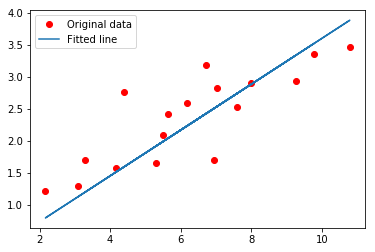

In [14]:
#Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, final_w * train_X + final_b, label='Fitted line')
plt.legend()
plt.show()